In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
# Read Intakes CSV into DF
file_path = "Austin_Animal_Center_Intakes.csv"
df = pd.read_csv(file_path)
df.head()


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [3]:
# Read Outcomes CSV into DF
outcomes_df = pd.read_csv("Austin_Animal_Center_Outcomes.csv")
outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [4]:
# Find total rows and columns
print(df.shape)
print(outcomes_df.shape)

(135708, 12)
(135974, 12)


In [5]:
# Find datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135708 entries, 0 to 135707
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         135708 non-null  object
 1   Name              94792 non-null   object
 2   DateTime          135708 non-null  object
 3   MonthYear         135708 non-null  object
 4   Found Location    135708 non-null  object
 5   Intake Type       135708 non-null  object
 6   Intake Condition  135708 non-null  object
 7   Animal Type       135708 non-null  object
 8   Sex upon Intake   135707 non-null  object
 9   Age upon Intake   135708 non-null  object
 10  Breed             135708 non-null  object
 11  Color             135708 non-null  object
dtypes: object(12)
memory usage: 12.4+ MB


In [6]:
# Determine amount of null values per column
df.isnull().sum()

Animal ID               0
Name                40916
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [7]:
# Find duplicate entries
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df)

number of duplicate rows:         Animal ID      Name                DateTime               MonthYear  \
3487     A830075    Waffle  03/02/2021 01:35:00 PM  03/02/2021 01:35:00 PM   
6648     A696688      Mari  02/10/2015 11:00:00 AM  02/10/2015 11:00:00 AM   
8692     A727043    *Larry  05/17/2016 03:46:00 PM  05/17/2016 03:46:00 PM   
11355    A761936       NaN  11/12/2017 11:16:00 AM  11/12/2017 11:16:00 AM   
15046    A561806     Dasia  06/05/2017 11:36:00 AM  06/05/2017 11:36:00 AM   
25717    A773428   *Atreyu  05/31/2018 06:38:00 PM  05/31/2018 06:38:00 PM   
42754    A815987  Princess  04/09/2020 03:32:00 PM  04/09/2020 03:32:00 PM   
49966    A735395       Owl  09/23/2016 12:00:00 PM  09/23/2016 12:00:00 PM   
58676    A698864       NaN  03/19/2015 01:37:00 PM  03/19/2015 01:37:00 PM   
59903    A764464    Pepper  09/17/2018 03:09:00 PM  09/17/2018 03:09:00 PM   
61351    A814983      Flor  06/08/2021 03:37:00 PM  06/08/2021 03:37:00 PM   
63067    A668183     Nacha  06/27/201

In [8]:
# Rename columns to eliminate spaces
df.rename(columns={'Animal ID': 'Animal_ID', 'Found Location': 'Found_Location', 'Intake Type': 'Intake_Type', 
                  'Intake Condition': 'Intake_Condition', 'Animal Type': 'Animal_Type', 'Sex upon Intake': 'Sex_upon_Intake',
                  'Age upon Intake': 'Age_upon_Intake'}, inplace=True)
df.columns

Index(['Animal_ID', 'Name', 'DateTime', 'MonthYear', 'Found_Location',
       'Intake_Type', 'Intake_Condition', 'Animal_Type', 'Sex_upon_Intake',
       'Age_upon_Intake', 'Breed', 'Color'],
      dtype='object')

<AxesSubplot:>

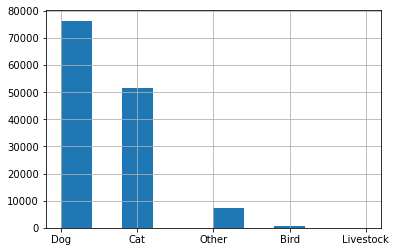

In [9]:
# Histogram to determine total amount of animals per type
df.Animal_Type.hist()

<AxesSubplot:>

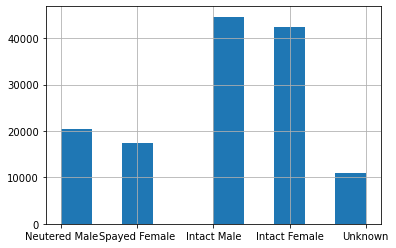

In [10]:
# Histogram to determine total amount of animals per sex
df.Sex_upon_Intake.hist()

In [11]:
df.describe().T

,count,unique,top,freq
Animal_ID,135708,121326,A721033,33
Name,94792,22795,Max,616
DateTime,135708,95381,09/23/2016 12:00:00 PM,64
MonthYear,135708,95381,09/23/2016 12:00:00 PM,64
Found_Location,135708,57378,Austin (TX),25492
Intake_Type,135708,6,Stray,93521
Intake_Condition,135708,15,Normal,117003
Animal_Type,135708,5,Dog,76356
Sex_upon_Intake,135707,5,Intact Male,44604
Age_upon_Intake,135708,53,1 year,23251


In [12]:
dog_df = df[df['Animal_Type'] == 'Dog']
dog_df.head()

,Animal_ID,Name,DateTime,MonthYear,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray
5,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate


<AxesSubplot:>

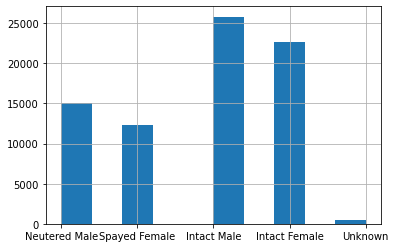

In [13]:
dog_df.Sex_upon_Intake.hist()

In [14]:
dog_df.describe().T

,count,unique,top,freq
Animal_ID,76356,64373,A721033,33
Name,63820,15429,Max,559
DateTime,76356,60885,02/19/2014 01:51:00 PM,49
MonthYear,76356,60885,02/19/2014 01:51:00 PM,49
Found_Location,76356,37426,Austin (TX),15253
Intake_Type,76356,6,Stray,52613
Intake_Condition,76356,13,Normal,68922
Animal_Type,76356,1,Dog,76356
Sex_upon_Intake,76355,5,Intact Male,25815
Age_upon_Intake,76356,49,2 years,14456


In [15]:
condition_counts = dog_df.Intake_Condition.value_counts()
condition_counts

Normal        68922
Injured        3411
Sick           1937
Nursing        1244
Aged            395
Other           133
Medical         123
Pregnant         71
Neonatal         62
Behavior         44
Feral            10
Med Urgent        2
Med Attn          2
Name: Intake_Condition, dtype: int64

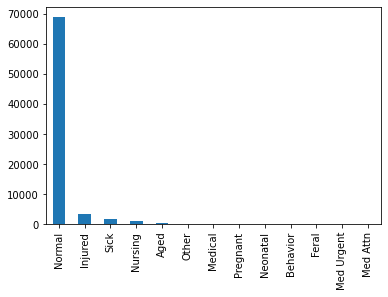

In [16]:
ax = plt.gca()
x = condition_counts
condition_counts.plot(kind='bar',x=x, ax=ax)
plt.show()

In [17]:
intake_type_counts = dog_df.Intake_Type.value_counts()
intake_type_counts

Stray                 52613
Owner Surrender       16680
Public Assist          6576
Abandoned               303
Euthanasia Request      183
Wildlife                  1
Name: Intake_Type, dtype: int64

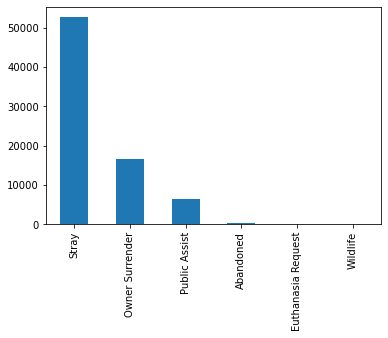

In [18]:
ax = plt.gca()
x = intake_type_counts
intake_type_counts.plot(kind='bar',x=x, ax=ax)
plt.show()

In [19]:
age_counts = dog_df.Age_upon_Intake.value_counts()
age_counts

2 years      14456
1 year       14254
3 years       5995
1 month       4486
4 years       3727
2 months      3629
5 years       3357
6 years       2264
4 months      1962
5 months      1951
7 years       1942
8 years       1803
3 months      1633
9 months      1560
7 months      1447
6 months      1444
10 years      1395
8 months      1134
9 years       1085
10 months      857
11 months      722
12 years       633
11 years       597
4 weeks        568
13 years       414
0 years        358
3 weeks        332
14 years       300
1 day          267
2 weeks        238
1 week         232
15 years       225
1 weeks        208
3 days         171
2 days         155
4 days         122
16 years       106
5 weeks         91
6 days          80
17 years        50
5 days          48
18 years        27
19 years        17
-1 years         6
20 years         4
23 years         1
-2 years         1
-3 years         1
24 years         1
Name: Age_upon_Intake, dtype: int64

In [20]:
breed_counts = dog_df.Breed.value_counts()
breed_counts

Pit Bull Mix                               8854
Labrador Retriever Mix                     7313
Chihuahua Shorthair Mix                    6459
German Shepherd Mix                        3273
Pit Bull                                   1837
                                           ... 
Rottweiler/Boxer                              1
Bluetick Hound/Treeing Walker Coonhound       1
Pit Bull/Jindo                                1
Schnauzer Giant/Labrador Retriever            1
Dachshund/American Pit Bull Terrier           1
Name: Breed, Length: 2409, dtype: int64

In [21]:
color_counts = dog_df.Color.value_counts()
color_counts

Black/White              8997
Brown/White              4375
Tan/White                4034
Black                    4032
White                    4025
                         ... 
Chocolate/Brown Merle       1
Red Merle/Tan               1
Brown Brindle/Blue          1
White/Tortie                1
Blue/Fawn                   1
Name: Color, Length: 383, dtype: int64

In [22]:
data = [df["Animal_ID"], df["Age_upon_Intake"]]
headers = ["ID", "Age"]
intake_age_df = pd.concat(data, axis=1, keys=headers)
intake_age_df.head()

,ID,Age
0,A786884,2 years
1,A706918,8 years
2,A724273,11 months
3,A665644,4 weeks
4,A682524,4 years


In [23]:
# new data frame with split value columns
new = intake_age_df["Age"].str.split(" ", n = 1, expand = True)

# making separate columns for the number and string from new data frame
intake_age_df["Age_Value"]= new[0]
intake_age_df["Age_Unit"]= new[1]

intake_age_df

,ID,Age,Age_Value,Age_Unit
0,A786884,2 years,2,years
1,A706918,8 years,8,years
2,A724273,11 months,11,months
3,A665644,4 weeks,4,weeks
4,A682524,4 years,4,years
...,...,...,...,...
135703,A850185,2 years,2,years
135704,A849503,2 months,2,months
135705,A850189,3 days,3,days
135706,A850191,3 days,3,days


In [24]:
unit_counts = intake_age_df.Age_Unit.value_counts()
unit_counts

years     53682
months    28405
year      23251
month     13349
weeks     13057
days       2138
week       1110
day         716
Name: Age_Unit, dtype: int64

In [25]:
# convert ages in months to ages in years

for row in intake_age_df.index:
    if((intake_age_df["Age_Unit"].values[row] == "months") | (intake_age_df["Age_Unit"].values[row] == "month")):
        intake_age_df["Age_Value"].values[row] = float(intake_age_df["Age_Value"].values[row])/12
    if((intake_age_df["Age_Unit"].values[row] == "weeks") | (intake_age_df["Age_Unit"].values[row] == "week")):
        intake_age_df["Age_Value"].values[row] = float(intake_age_df["Age_Value"].values[row])/52
    if((intake_age_df["Age_Unit"].values[row] == "days") | (intake_age_df["Age_Unit"].values[row] == "day")):
        intake_age_df["Age_Value"].values[row] = float(intake_age_df["Age_Value"].values[row])/365
    if((intake_age_df["Age_Unit"].values[row] == "years") | (intake_age_df["Age_Unit"].values[row] == "year")):
        intake_age_df["Age_Value"].values[row] = float(intake_age_df["Age_Value"].values[row])
        
intake_age_df.head()

,ID,Age,Age_Value,Age_Unit
0,A786884,2 years,2.0,years
1,A706918,8 years,8.0,years
2,A724273,11 months,0.916667,months
3,A665644,4 weeks,0.076923,weeks
4,A682524,4 years,4.0,years


In [26]:
# put converted age back into intake dataframe
df["Age_in_Years"] = intake_age_df["Age_Value"]
df.head()

,Animal_ID,Name,DateTime,MonthYear,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,Age_in_Years
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,2.0
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,8.0
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0.916667
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico,0.076923
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,4.0


In [27]:
intake_dog_df = df[df['Animal_Type'] == 'Dog']
intake_dog_df.head()

,Animal_ID,Name,DateTime,MonthYear,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,Age_in_Years
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,2.0
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,8.0
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0.916667
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,4.0
5,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,2.0


In [28]:
age_counts = intake_dog_df.Age_in_Years.value_counts()
age_counts

 2.000000     14456
 1.000000     14254
 3.000000      5995
 0.083333      4486
 4.000000      3727
 0.166667      3629
 5.000000      3357
 6.000000      2264
 0.333333      1962
 0.416667      1951
 7.000000      1942
 8.000000      1803
 0.250000      1633
 0.750000      1560
 0.583333      1447
 0.500000      1444
 10.000000     1395
 0.666667      1134
 9.000000      1085
 0.833333       857
 0.916667       722
 12.000000      633
 11.000000      597
 0.076923       568
 0.019231       440
 13.000000      414
 0.000000       358
 0.057692       332
 14.000000      300
 0.002740       267
 0.038462       238
 15.000000      225
 0.008219       171
 0.005479       155
 0.010959       122
 16.000000      106
 0.096154        91
 0.016438        80
 17.000000       50
 0.013699        48
 18.000000       27
 19.000000       17
-1.000000         6
 20.000000        4
 23.000000        1
-2.000000         1
-3.000000         1
 24.000000        1
Name: Age_in_Years, dtype: int64

In [34]:
# Create Age Bins
age_bins = [0, 1, 3, 7, 8]
group_names = ['0-1', '1-3', '3-7', '8_Older']

#Add bins to df, categorize age according to bin
intake_dog_df["Age_Group"] = pd.cut(intake_dog_df["Age_in_Years"], age_bins, labels=group_names)

intake_dog_df.head()

/Users/jordanthomas/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Animal_ID,Name,DateTime,MonthYear,Found_Location,Intake_Type,Intake_Condition,Animal_Type,Sex_upon_Intake,Age_upon_Intake,Breed,Color,Age_in_Years,Age_Group
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,2.0,1-3
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,8.0,8_Older
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,0.916667,0-1
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,4.0,3-7
5,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,2.0,1-3


In [ ]:
age_counts.describe()

In [ ]:
outcomes_df.info()

In [ ]:
outcomes_df.rename(columns={'Animal ID': 'Animal_ID', 'Date of Birth': 'Date_of_Birth', 'Outcome Type': 'Outcome_Type',
                           'Outcome Subtype': 'Outcome_Subtype', 'Animal Type': 'Animal_Type', 'Sex upon Outcome':
                           'Sex_upon_Outcome', 'Age upon Outcome': 'Age_upon_Outcome'}, inplace=True)
outcomes_df.head()

In [ ]:
outcome_counts = outcomes_df.Outcome_Type.value_counts()
outcome_counts

In [ ]:
outcome_counts.plot.bar(x="Type", y="Outcome")
plt.show()

In [ ]:
subtype_counts = outcomes_df.Outcome_Subtype.value_counts()
subtype_counts